In [4]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
db_filename = 'dinofunworld.db'
#conn = sqlite3.connect("./readonly/{0}".format(db_filename)) 
conn = sqlite3.connect(db_filename) 
c = conn.cursor()
# db_filename = 'dinofunworld.db'
# conn = sqlite3.connect("./readonly/{0}".format(db_filename))
# c = conn.cursor()

In [6]:
#Some of the park's administrators are having trouble interpreting the control chart graph of 'Atmosfear' attendance, 
#so they ask you to also provide a moving average chart of the attendance in addition to the control chart created 
# in Part 1. In this case, they request that you use 50 samples for the size of the moving average window.
#Part1 of the assignment available at - https://github.com/pranayboggarapu/DataVisualization/blob/main/Assignment4_Part1.ipynb

In [7]:
'''Returns the split of sequence string and returns a list of 1/0 based 
on if the user is present near atmosFear or not'''
def getAttendance(sequenceString):
    totalSequences = sequenceString.split('-')
    return list(map(lambda y: 1 if y==atmosFearAttractionId else 0, totalSequences))

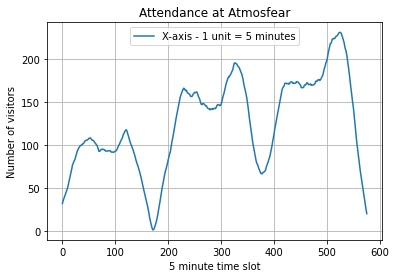

In [13]:
rideName = 'Atmosfear'
window_size=50
atmosFearFromDB = c.execute("SELECT AttractionID from attraction WHERE Name='{0}'".format(rideName)).fetchall()[0][0]

# return type from db will be of type int
atmosFearAttractionId = str(atmosFearFromDB)

sequences = c.execute("SELECT Sequence FROM Sequences").fetchall()
sequenceDataFrame = pd.DataFrame.from_records(sequences, columns = ['Sequences'])
atmosFearForEveryVisitor = list(map(lambda x: getAttendance(x), sequenceDataFrame['Sequences']))
summedAtmosFearVisitorsValue = [0]*len(atmosFearForEveryVisitor[0])

for atmosFearAVisitor in atmosFearForEveryVisitor:
    summedAtmosFearVisitorsValue = [sum(x) for x in zip(summedAtmosFearVisitorsValue, atmosFearAVisitor)]

plt.plot(np.convolve(summedAtmosFearVisitorsValue, np.ones(window_size,)/window_size, 'same'))
plt.title('Attendance at Atmosfear')
plt.xlabel('5 minute time slot')
plt.ylabel('Number of visitors')
plt.grid(True)

#adding the legend and changing the color of the legend
plt.legend(['X-axis - 1 unit = 5 minutes'], loc=9)
ax = plt.gca()
leg = ax.get_legend()
hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
hl_dict['_child0'].set_color('indigo')
plt.show()